# Splines

In [2]:
from IPython import get_ipython
if get_ipython():
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')

import numpy as np
import pandas as pd
import torch

import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns

import collections

import latenta as la
la.logger.setLevel("INFO")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Random walks

In [3]:
cells = la.Dim(pd.Series(range(100), name = "cell").astype(str))
genes = la.Dim(pd.Series(range(4), name = "gene").astype(str))

In [4]:
dist = la.distributions.RandomWalk(10, la.distributions.Normal())

In [5]:
dist.run_recursive()
print(dist.value)
print(dist.likelihood)

tensor([ 0.0000, -0.1374,  1.7391,  2.6996,  4.0017,  3.6598,  3.9581,  4.8703,
         5.0973,  4.8644])
tensor([-11.9213])


In [6]:
knots = la.Dim(range(10), "knot")

In [7]:
dist = la.distributions.RandomWalk(10, la.distributions.Normal(), definition = la.Definition([genes, knots]))

In [8]:
dist.run_recursive()
print(dist.value)
print(dist.likelihood)

tensor([[ 0.0000, -0.6136, -2.4677, -1.3425, -0.5604, -0.6720, -0.8533, -0.9590,
          0.4455,  1.4637],
        [ 0.0000, -0.9174, -1.3609, -2.1221, -2.2377, -0.7123, -2.5375, -2.6546,
         -4.0205, -3.2178],
        [ 0.0000, -1.3315, -1.8834, -0.6683, -0.6450, -0.1304,  1.5364,  1.7529,
          1.1117, -0.7782],
        [ 0.0000, -0.4147, -3.3343, -4.0321, -3.1262, -2.0567, -0.2954, -1.8923,
         -2.7587, -2.6561]])
tensor([[-12.6494],
        [-13.1772],
        [-13.5842],
        [-17.0511]])


In [9]:
knots = la.Dim(range(10), "knot")

In [10]:
dist = la.distributions.RandomWalk(10, la.distributions.Normal(), definition = la.Definition([knots, genes]))

In [11]:
dist.reset_recursive()
dist.run_recursive()
print(dist.value)
print(dist.step.likelihood)
print(dist.likelihood)
print(dist.log_prob(dist.value))
print(dist.log_prob(torch.zeros(dist.value.shape)))

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000],
        [-1.3371,  0.9324, -0.6907, -0.0138],
        [-0.4762,  1.2237, -0.4247,  1.8951],
        [ 0.8255,  1.1510,  0.3410,  2.2623],
        [ 0.9734,  1.0086, -0.5740,  2.3455],
        [ 1.6399,  1.1547,  0.6021,  1.9263],
        [ 3.4833,  1.0640,  1.2008,  3.5598],
        [ 3.5062,  0.4826,  0.0237,  1.5643],
        [ 4.7184, -0.6152,  0.6417,  2.2369],
        [ 4.2033, -0.3022,  1.3085,  1.3894]])
tensor([[-1.8128, -1.3536, -1.1574, -0.9190],
        [-1.2895, -0.9614, -0.9543, -2.7410],
        [-1.7661, -0.9216, -1.2121, -0.9863],
        [-0.9299, -0.9291, -1.3375, -0.9224],
        [-1.1411, -0.9296, -1.6106, -1.0068],
        [-2.6179, -0.9231, -1.0982, -2.2531],
        [-0.9192, -1.0879, -1.6117, -2.9100],
        [-1.6537, -1.5216, -1.1099, -1.1451],
        [-1.0516, -0.9679, -1.1412, -1.2781]])
tensor([[-13.1818,  -9.5958, -11.2330, -14.1620]])
tensor([[-13.1818,  -9.5958, -11.2330, -14.1620]])
tensor([[-8.2704, -8.2


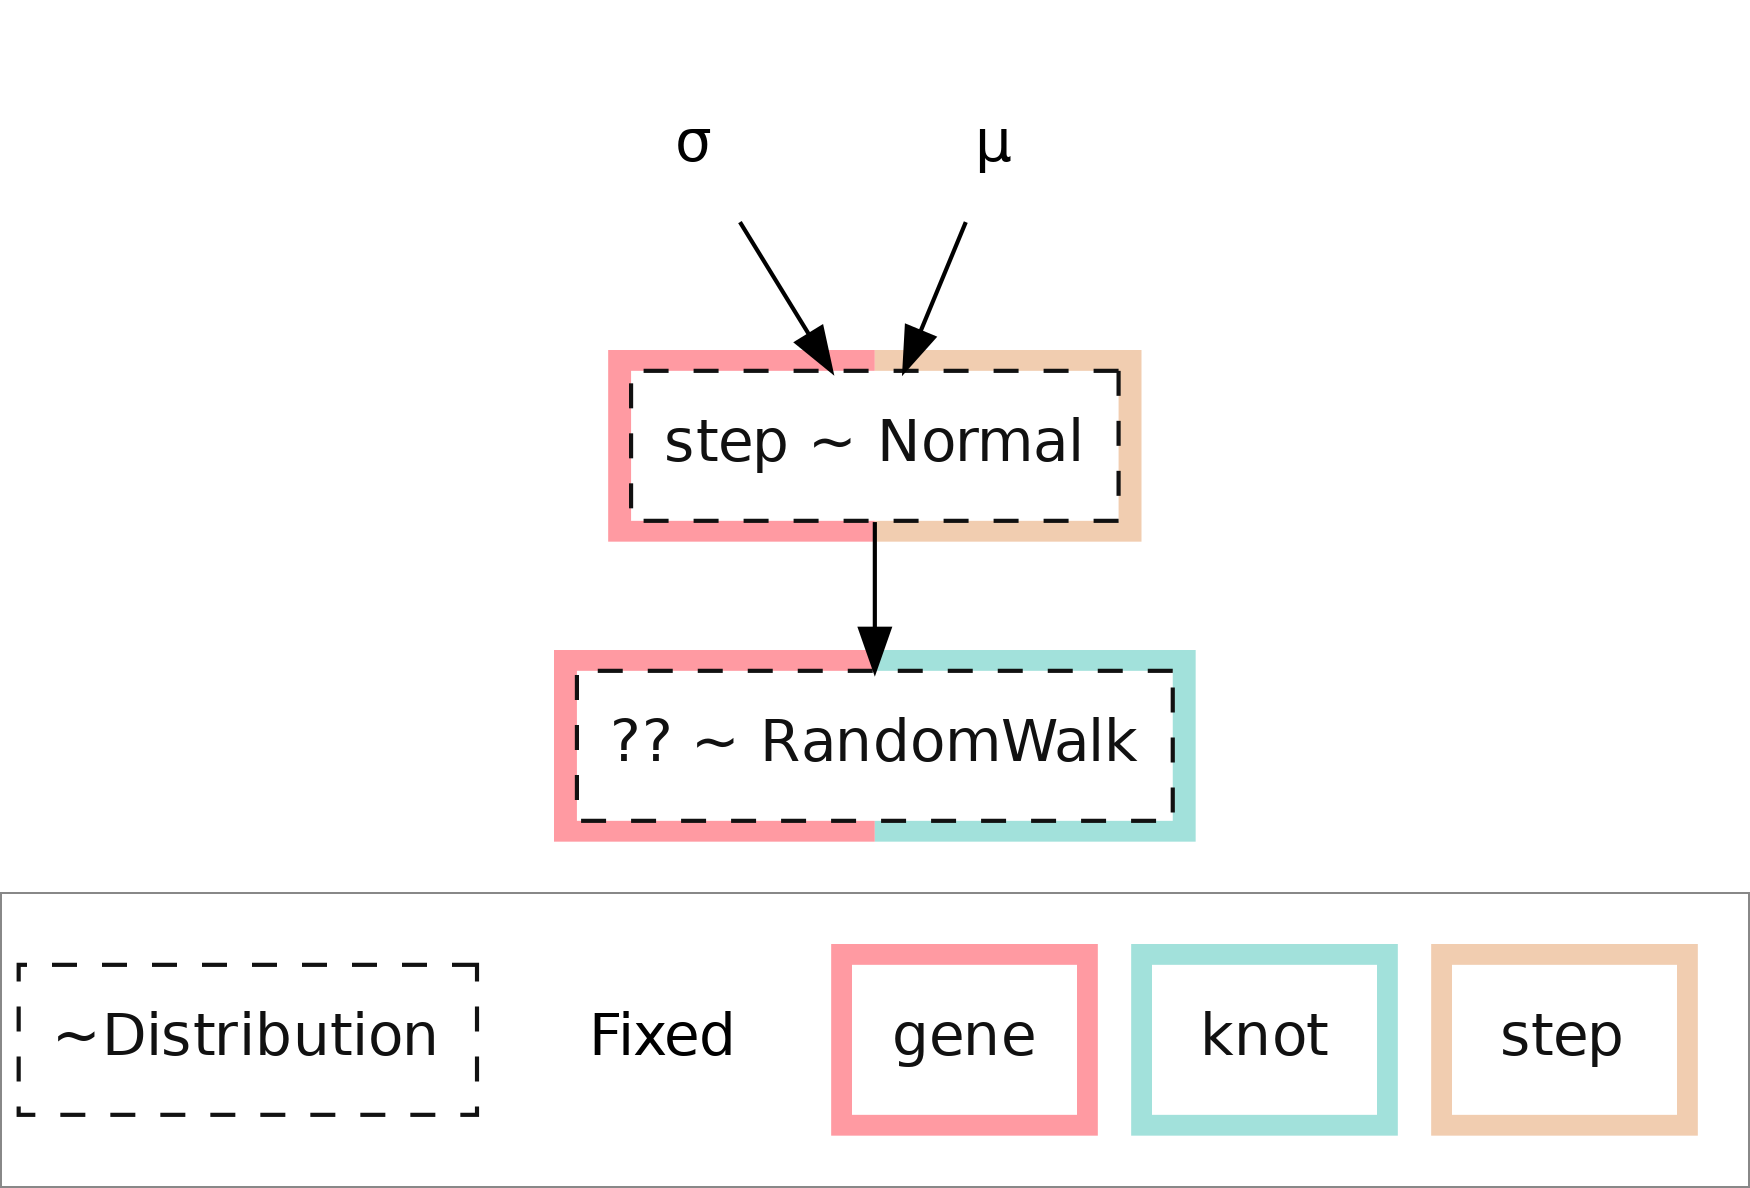

In [12]:
dist = la.distributions.RandomWalk(10, la.distributions.Normal(definition = la.Definition([genes])))
dist.plot()

In [13]:
dist.reset_recursive()
dist.run_recursive()
print(dist.value)
print(dist.step.likelihood)
print(dist.likelihood)
print(dist.log_prob(dist.value))
print(dist.log_prob(torch.zeros(dist.value.shape)))

tensor([[ 0.0000,  0.4239, -1.1489, -0.7725, -2.1808, -3.1550, -2.2862, -1.6011,
         -1.1523, -1.3267],
        [ 0.0000, -0.6480, -1.2167, -0.9313, -2.2697, -2.1531, -1.6742, -0.7796,
         -2.0606, -2.4636],
        [ 0.0000,  0.4730,  1.7871,  1.5505,  0.7946,  2.2804,  2.7496,  2.9218,
          2.0540, -0.3173],
        [ 0.0000,  0.4650,  0.6970,  0.0340, -0.1920,  0.5223,  1.0841,  2.0472,
          1.7609,  0.8541]])
tensor([[-1.0088, -2.1558, -0.9898, -1.9106, -1.3935, -1.2963, -1.1536, -1.0196,
         -0.9341],
        [-1.1289, -1.0807, -0.9597, -1.8146, -0.9257, -1.0336, -1.3191, -1.7393,
         -1.0002],
        [-1.0308, -1.7824, -0.9469, -1.2046, -2.0227, -1.0290, -0.9338, -1.2954,
         -3.7306],
        [-1.0271, -0.9458, -1.1387, -0.9445, -1.1740, -1.0767, -1.3828, -0.9599,
         -1.3301]])
tensor([[-11.8621],
        [-11.0018],
        [-13.9763],
        [ -9.9796]])
tensor([[-11.8621],
        [-11.0018],
        [-13.9763],
        [ -9.9796]])


In [14]:
genes = la.Dim(pd.Series(range(100), name = "gene").astype(str))

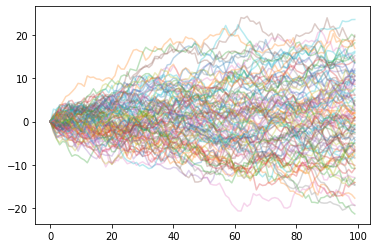

In [15]:
dist = la.distributions.RandomWalk(100, la.distributions.Normal(definition = la.Definition([genes])))
dist.run_recursive()
value = dist.value.cpu().numpy()
for i in range(value.shape[0]):
    sns.lineplot(x = np.arange(value.shape[1]), y = value[i], alpha = 0.3)

## Generative model

In [16]:
n_cells = 50
cell_ids = [str(i) for i in range(n_cells)]
cells = la.Dim(pd.Series(cell_ids, name = "cell"))

x = la.Fixed(pd.Series(np.random.uniform(0, 3, n_cells), index = cells.index), label = "x")

In [17]:
n_genes = 100
n_knots = 10
genes = la.Dim([str(i) for i in range(n_genes)], id = "gene")
knots = la.Dim(range(n_knots), id = "knot")

steps = np.random.choice([-1, 1], (n_genes, n_knots)) * np.random.normal(3., 1., (n_genes, n_knots)) * (np.random.random((n_genes, n_knots)) > 0.5)
a_value = steps.cumsum(1)
a_value = a_value - a_value.mean(1, keepdims = True)
a = la.Fixed(
    pd.DataFrame(
        a_value,
        columns = knots.index, index = genes.index),
    label = "a"
)
intercept = la.Fixed(pd.Series(np.random.choice([-1, 1], n_genes) * np.random.normal(3., 1., n_genes) * (np.random.random(n_genes) > 0.5), index = genes.index), label = "intercept")
scale = la.Fixed(pd.Series(np.random.uniform(1., 1.2, n_genes), index = genes.index), label = "scale")

In [19]:
y = la.links.scalar.Spline(x = x, a = a, b = intercept)
dist = la.distributions.Normal(loc = y, scale = scale)


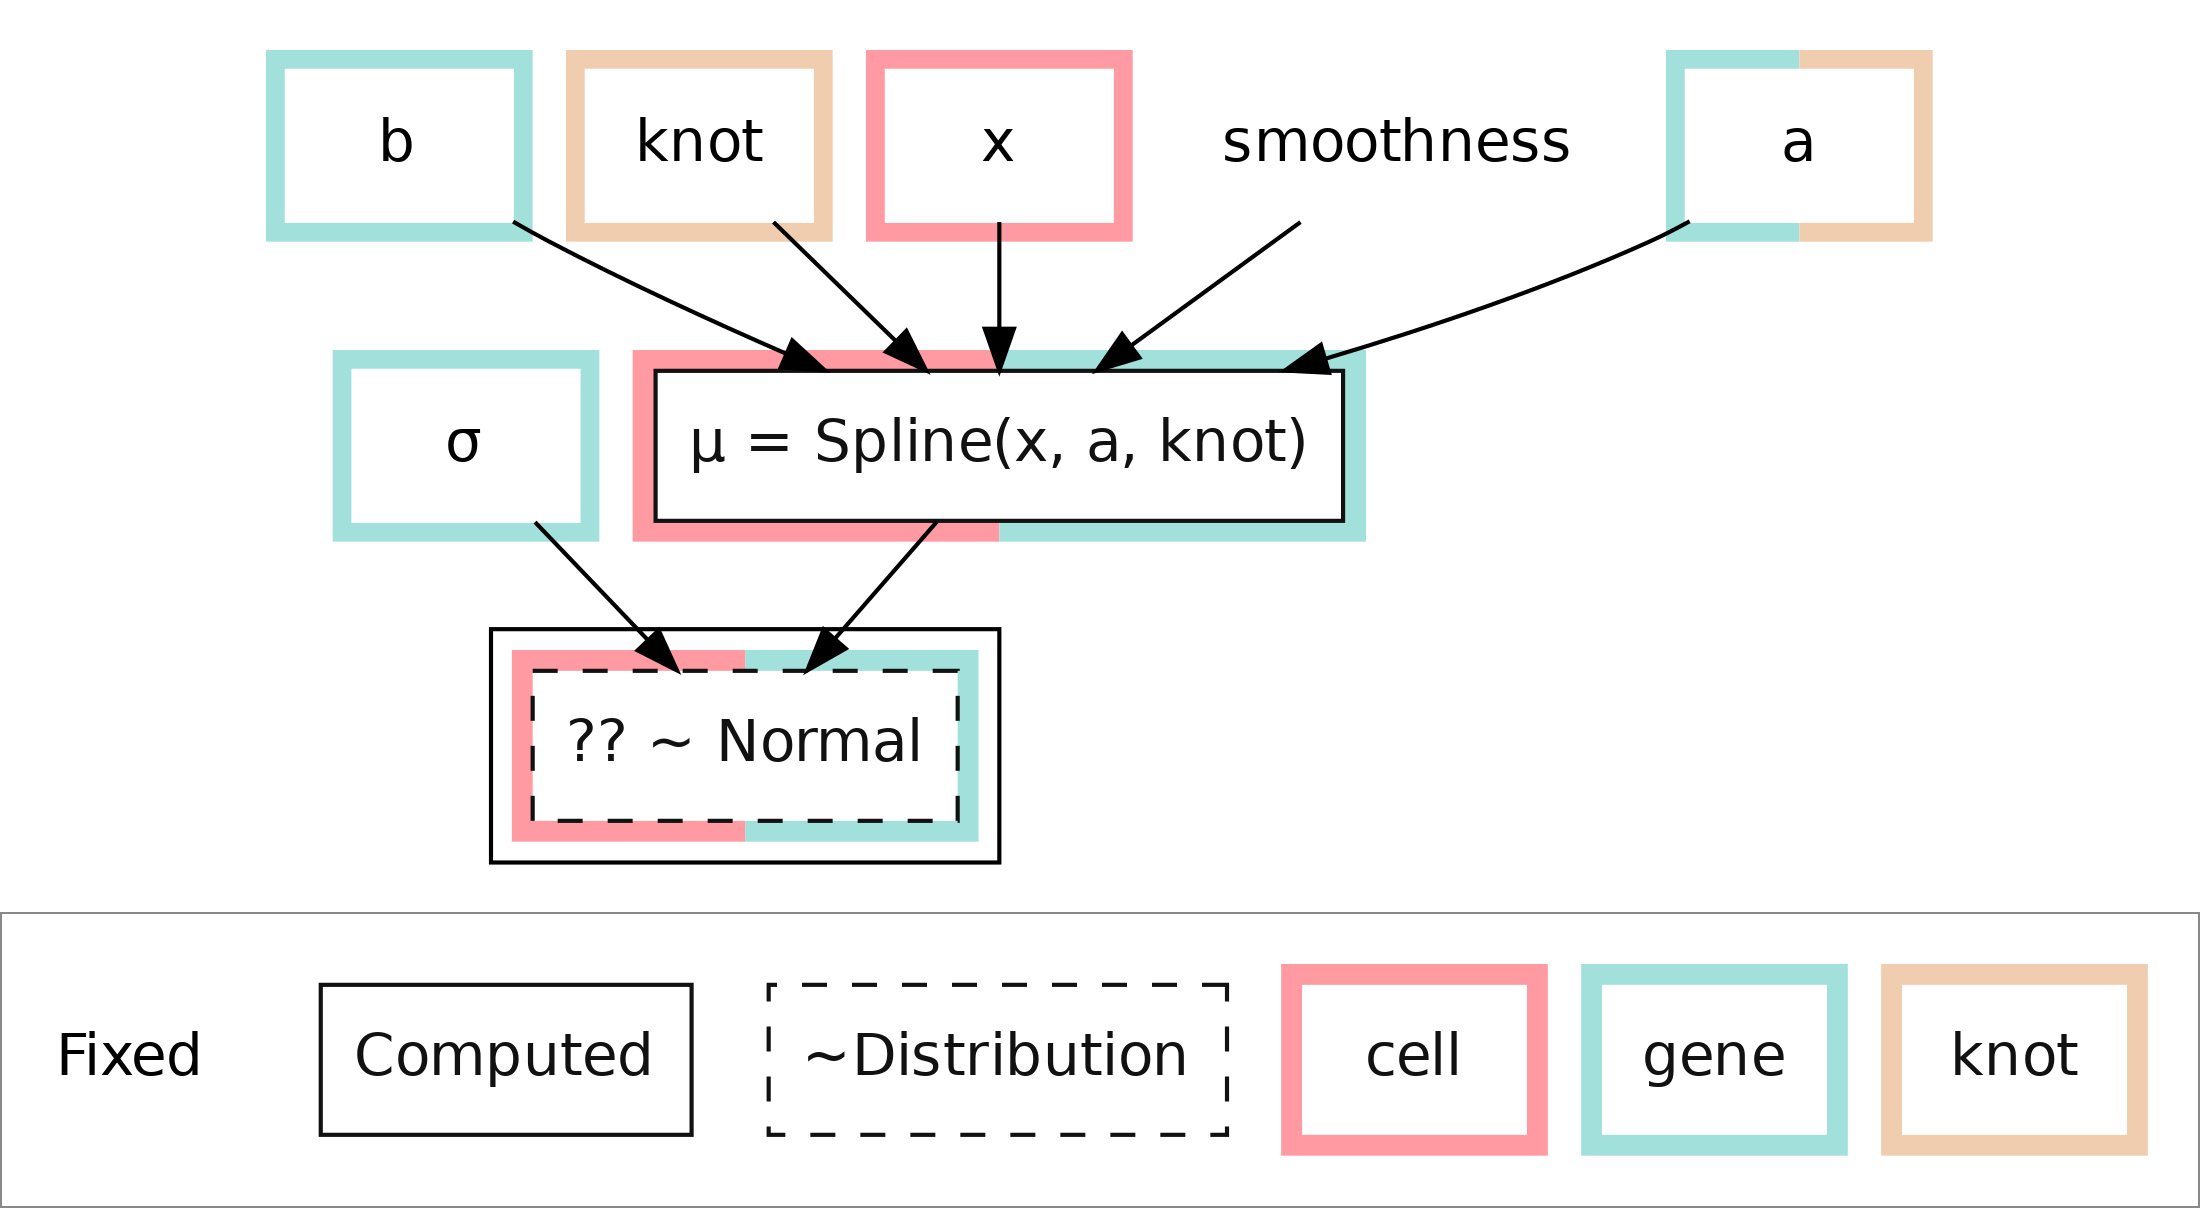

In [20]:
model_gs = la.Model(dist, label = "ground truth", symbol = "gs")
model_gs.plot()

In [21]:
posterior = la.posterior.Posterior(dist)
posterior.sample(1)

  0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='gene', ylabel='cell'>

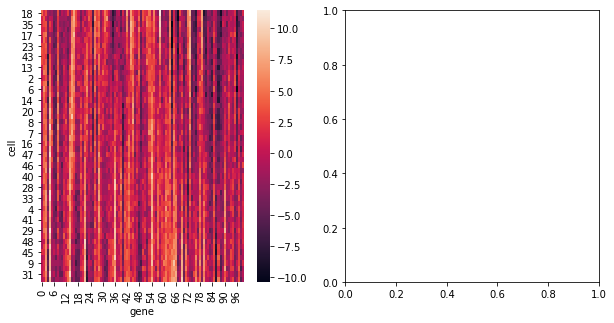

In [22]:
loc_value = posterior.samples[dist.loc].sel(sample = 0).to_pandas()
observation_value = posterior.samples[dist].sel(sample = 0).to_pandas()
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (10, 5))
cell_order = model_gs.find_recursive("x").prior_pd().sort_values().index
sns.heatmap(observation_value.loc[cell_order], ax = ax0)

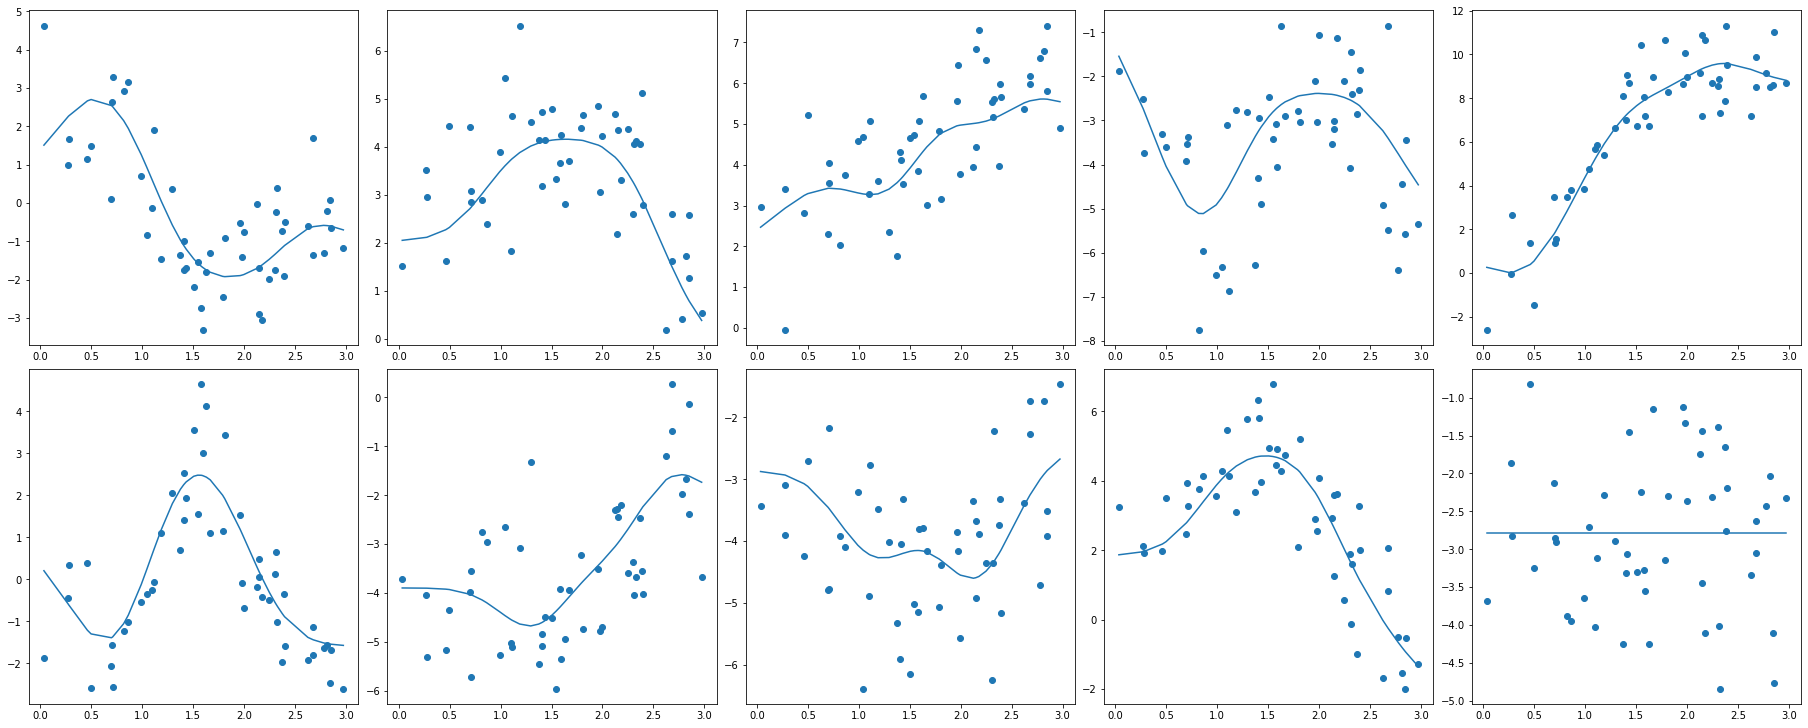

In [23]:
observation_value = posterior.samples[dist].sel(sample = 0).to_pandas()
gene_ids = genes.coords[:10]
fig, axes = la.plotting.axes_wrap(len(gene_ids))
cell_order = model_gs.find_recursive("x").prior_pd().sort_values().index
x_value = model_gs.find_recursive("x").prior_pd()

for gene_id, ax in zip(gene_ids, axes):
    ax.scatter(
        x_value.loc[cell_order],
        observation_value.loc[cell_order, gene_id]
    )
    ax.plot(
        x_value.loc[cell_order],
        loc_value.loc[cell_order, gene_id]
    )
# sns.heatmap(observation_value.loc[cell_order], ax = ax0)

## Regression with variational inference

In [24]:
s = la.Parameter(1., definition = scale, transforms = la.distributions.Exponential().biject_to())

z = la.links.scalar.Spline(x, knot = model_gs.find_recursive("knot"), b = intercept, output = y.value_definition)

dist = la.distributions.Normal(loc = z, scale = s)

observation = la.Observation(observation_value, dist, label = "observation")


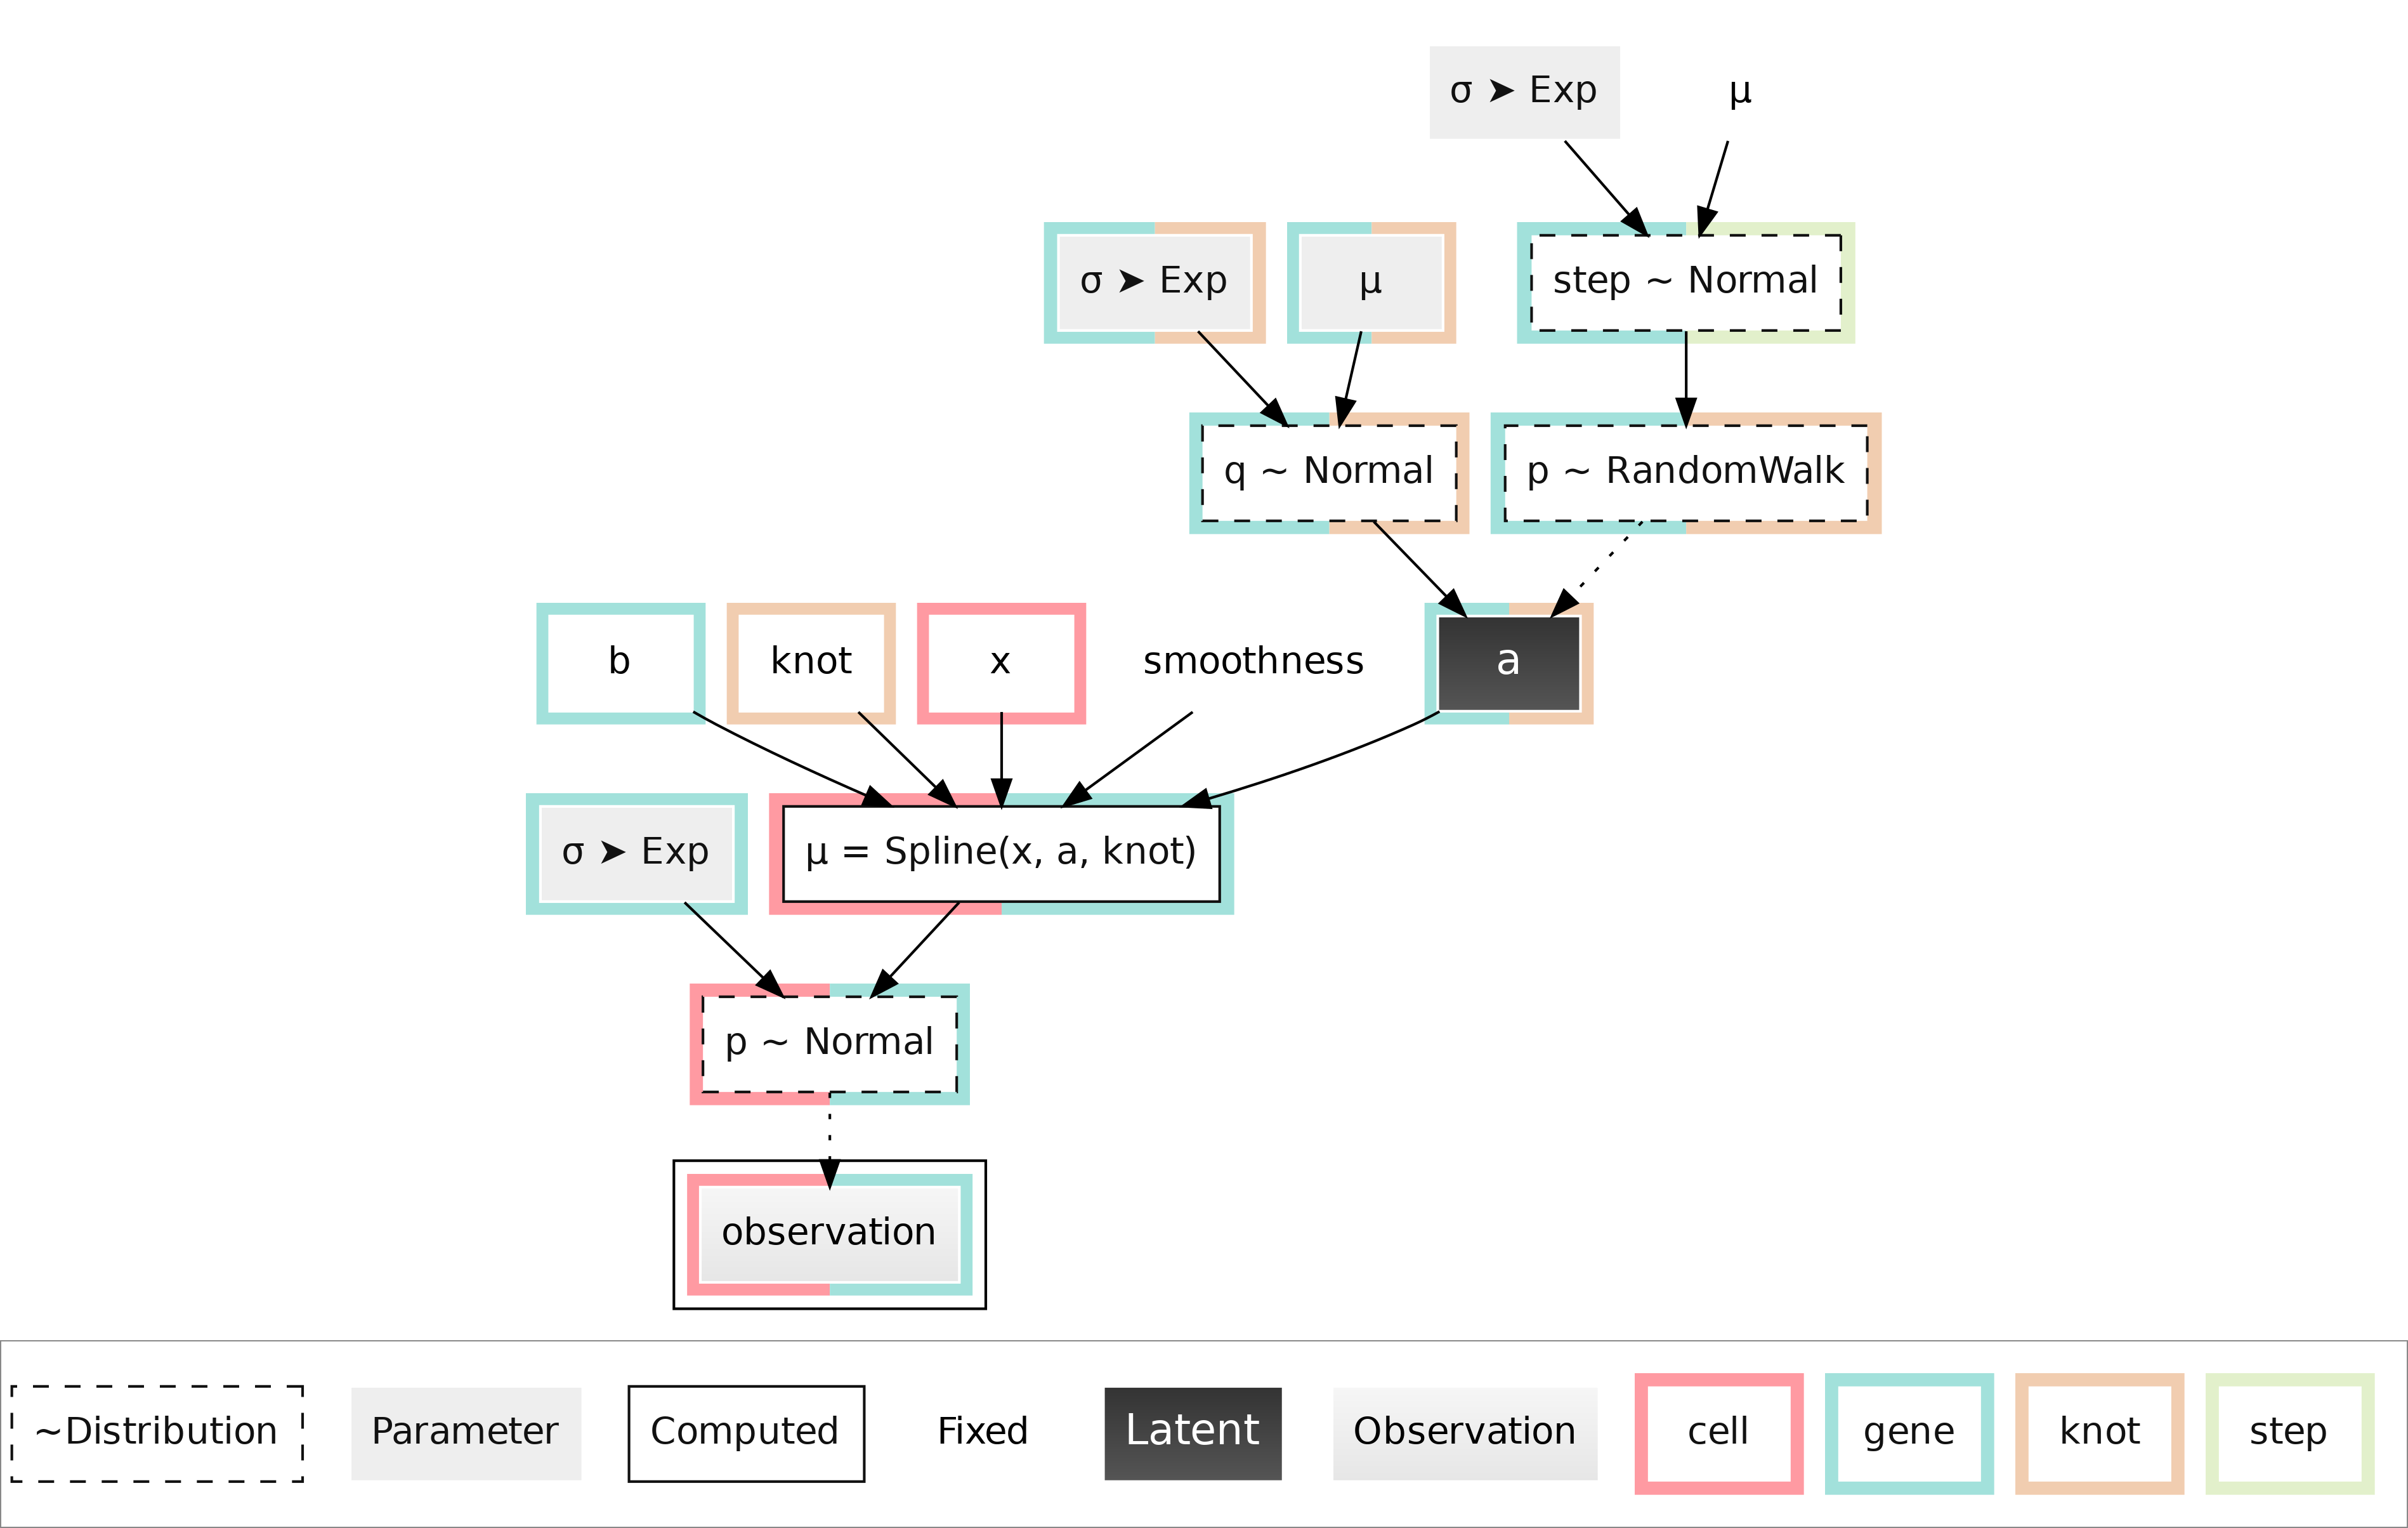

In [25]:
model = la.Model(observation)
model.plot()

  0%|                                                                                                         …

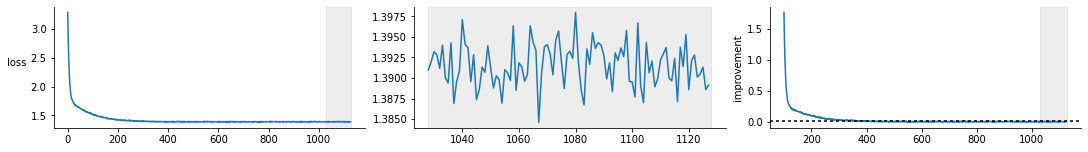

In [26]:
inference = la.infer.svi.SVI(model, [la.infer.loss.ELBO()], la.infer.optim.Adam(lr = 0.05))
trainer = la.infer.trainer.Trainer(inference)
trace = trainer.train(3000)
trace.plot();
# inference = la.infer.svi.SVI(model, [la.infer.loss.ELBO()], la.infer.optim.Adam(lr = 0.05))
# trainer = la.infer.trainer.Trainer(inference)
# trace = trainer.train(3000)
# trace.plot();

In [27]:
observed = la.posterior.Posterior(observation)
observed.sample(10, subsample_n = 3)

  0%|          | 0/10 [00:00<?, ?it/s]

<AxesSubplot:xlabel='gene', ylabel='cell'>

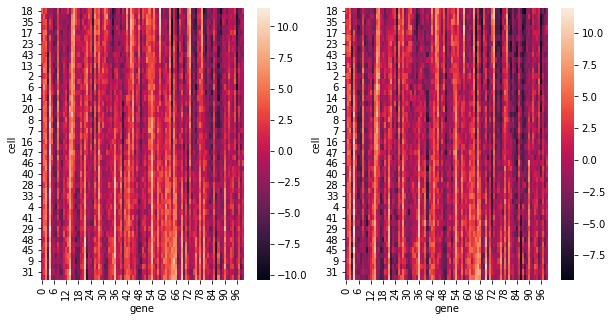

In [28]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (10, 5))
cell_order = model_gs.find_recursive("x").prior_pd().sort_values().index
sns.heatmap(observation_value.loc[cell_order], ax = ax0)
modelled_value = observed.samples[observation.p].sel(sample = 0).to_pandas()
sns.heatmap(modelled_value.loc[cell_order], ax = ax1)

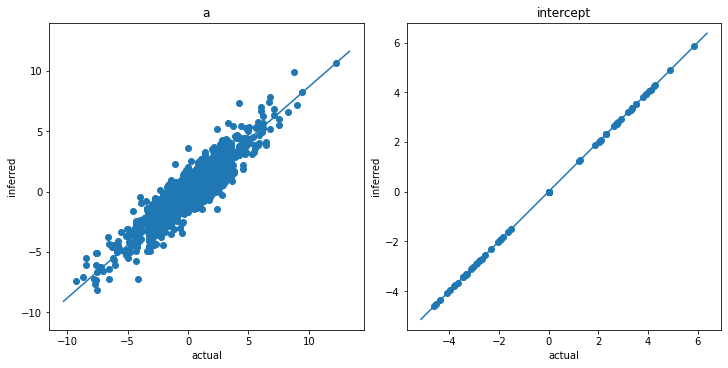

In [29]:
parameter_values = la.qa.cookbooks.check_parameters(la.qa.cookbooks.gather_parameters(["a", "intercept"], model_gs, observed))

In [30]:
dim = la.Dim([1, 2, 3, 4], "h")

In [31]:
x_value = pd.Series(
    [1., 2., 3., 0.],
    index = dim.index,
    name = "x"
)
x = la.Fixed(x_value)

y = la.links.scalar.Spline(x)

assert y.value_definition[0] == x[0]
assert y.ndim == 1